# Clasificatorios

## K means

El algoritmo k-means resuelve un problema de optimización, siendo la función a optimizar (minimizar) la suma de las distancias cuadráticas de cada objeto al centroide de su cluster.

Los objetos se representan con vectores reales de d dimensiones (x1,x2,…,xn) y el algoritmo k-means construye k grupos donde se minimiza la suma de distancias de los objetos, dentro de cada grupo S={S1,S2,…,Sk}, a su centroide. El problema se puede formular de la siguiente forma:

$$\underset{\mathbf{S}}{\mathrm{min}}\; E\left(\boldsymbol{\mu_{i}}\right)=\underset{\mathbf{S}}{\mathrm{min}}\sum_{i=1}^{k}\sum_{\mathbf{x}_{j}\in S_i}\left\Vert \mathbf{x}_{j}-\boldsymbol{\mu}_{i}\right\Vert ^{2}
\quad (1)$$

### Data set

In [1]:
import random
import matplotlib.pyplot as plt
import math
from tools import leerarchivo #mi libreria de utilidades

data = open('data.csv','w') # Archivo data
ln= [] # Linea de texto para agregar al buffer

for i in range(1,1001):
    ln=str(i)+","+str(random.randint(1,10))+","+str(random.randint(1,10))+","+str(random.randint(1,10))+","+str(random.randint(1,10))+","+str(random.randint(1,10))+"\n"
    buffer=str(ln)
    data.write(buffer)


data.close()

 ### Ejemplo de clase

![alt text](clase6.png)  

<blockquote><div style="background-color:#DCDCDC; color:#000000; font-style: normal; font-family: Georgia;">2021 - 05 - 18
</div>Para el ejemplo de clase se realizo en formato excel la explicacion del algoritmo de k-means con 3 centroides, se utilizó la medida de simiitud coseno para obtener el mayor y asignar la clase para: 
    
<code>c1=[9,7,8,4,7]</code>
<code>c2=[10,10,8,6,8]</code>
<code>c3=[9,8,9,5,6]</code>
    
</blockquote>



```matlab
load setkmeans.txt

A = setkmeans(:,:); % carga todo el set

[f,c] = size(A);

k = 3; % cantidad de clusters
it = 1; % para controlar las iteraciones del paso 2
it2 = 2; % para controlar las iteraciones del paso 2
programa = 1; % para controlar la salida del WHILE



%% paso 1
%para seleccionar los 3 centroides aleatorios sin que se repitan
h = 0;
for i = 1 : f
    bandera  = 0;
    num = randi([1,f],1); 
    if i == 1
        N(i) = num; 
        C(1,:) = A(num,:); 
    else
        y = length(N);
        for j = 1 : y
            if num == N(j)
                bandera = bandera + 1;
            end
        end
        if bandera == 0
            N(y+1) = num;
            h = length(N);
            C(h,:) = A(num,:);
        end
        if h == 3
            break;
        end
    end
end

for i = 1 : k % calcualr distancia con los 3 centroides
    for j = 1 : f % recorrer los elementos de la tabla
        x = 0;
        y = 0;
        arriba = 0;
        for l = 1 : c % recorrer las variables 
            arriba = arriba + (A(j,l) * C(i,l));
            x = x + (A(j,l)^2);
            y = y + (C(i,l)^2);
        end
        R(j,i) = arriba / sqrt(x*y);
    end
    
end

for i = 1 : f
    [dato, pos] = max(R(i,:));
    A(i,6) = pos; % para colocar el cluster de cada observacion
end

%% paso 2
while (programa == 1)
    posC1 = 1;
    posC2 = 1;
    posC3 = 1;
    C1 = [];
    C2 = [];
    C3 = [];
    for i = 1 : f
        if A(i,c + it) == 1
            C1(posC1,:) = A(i,:);
            posC1 = posC1 + 1;
        elseif A(i,c + it) == 2
            C2(posC2,:) = A(i,:);
            posC2 = posC2 + 1;
        elseif A(i,c + it) == 3
            C3(posC3,:) = A(i,:);
            posC3 = posC3 + 1;
        end
    end

    % calcular nuevos centroides
    for i = 1 : c
        Cn(1,i) = mean(C1(:,i));
    end

    for i = 1 : c
        Cn(2,i) = mean(C2(:,i));
    end

    for i = 1 : c
        Cn(3,i) = mean(C3(:,i));
    end

    R =[];
    for i = 1 : k % calcular distancia con los 3 centroides
        for j = 1 : f % recorrer los elementos de la tabla
            x = 0;
            y = 0;
            arriba = 0;
            for l = 1 : c % recorrer las variables 
                arriba = arriba + (A(j,l) * Cn(i,l));
                x = x + (A(j,l)^2);
                y = y + (Cn(i,l)^2);
            end
            R(j,i) = arriba / sqrt(x*y);
        end

    end

    for i = 1 : f
        [dato, pos] = max(R(i,:));
        A(i,c + it2) = pos; % para colocar el cluster de cada observacion
    end

    if isequal(A(:,c + it),A(:,c + it2))
        programa = 0;
        %break; para cuando ponga el WHILE
    else
       it = it + 1;
       it2 = it + 1; 
    end
end


```


### Tarea:  jueves, 20 de mayo del 2021, 18:00

In [2]:
from medidas_similitud import coseno #se encuentran en mi archivo medidas_similitud.py de la Unidad1
from tools import ConvertToVector #Libreria de mia autoria para tomar una columna del archivo csv, se encuentran en mi archivo tools.py

In [3]:
# Lectura del archivo data.csv
data = open('data.csv','r')
leerarchivo(data)
data.close()

1,9,2,2,2,5

2,9,9,6,1,3

3,1,3,8,1,5

4,10,2,5,10,1

5,1,9,9,7,7

6,1,3,7,7,5

7,4,1,5,7,5

8,1,2,9,1,3

9,4,9,10,2,5

10,2,2,5,6,3

11,6,5,9,2,6

12,2,3,7,5,6

13,4,2,7,5,10

14,7,9,4,8,6

15,8,6,4,9,5

16,4,7,3,8,2

17,10,6,8,8,1

18,1,8,7,1,2

19,5,10,1,10,5

20,3,2,7,8,3

21,10,3,6,4,2

22,7,8,10,4,7

23,1,6,5,7,8

24,6,9,10,4,6

25,3,10,6,7,1

26,2,5,2,8,6

27,1,1,5,6,4

28,1,7,2,1,2

29,5,9,2,10,5

30,3,1,3,2,7

31,8,4,5,8,6

32,9,10,7,5,1

33,1,10,2,10,3

34,6,1,1,7,7

35,3,10,2,3,1

36,2,6,6,1,8

37,10,4,1,8,4

38,7,10,10,3,6

39,8,7,8,2,6

40,6,10,10,6,7

41,5,2,2,1,5

42,2,6,10,2,1

43,9,3,8,5,6

44,10,9,4,2,7

45,1,7,3,7,8

46,3,1,2,9,5

47,4,9,2,4,9

48,8,1,1,9,10

49,2,7,10,4,2

50,1,10,8,1,6

51,5,10,6,4,4

52,3,6,3,5,10

53,1,9,3,5,7

54,3,4,4,3,7

55,5,8,2,1,5

56,6,8,7,4,1

57,10,9,4,2,7

58,5,6,10,9,7

59,10,10,2,8,8

60,1,5,10,2,4

61,9,5,7,9,4

62,6,2,3,6,10

63,10,3,8,6,5

64,5,2,10,5,10

65,2,2,6,5,3

66,1,5,8,8,8

67,4,1,8,7,1

68,6,1,2,8,5

69,7,5,9,5,3

70,10,

#### Paso 1
Seleccionar los 3 centroides aleatorios sin que se repitan

In [4]:
num=1000 #Primeros 1000 como prueba

c1=random.randint(1,1000)
c2=random.randint(1,1000)
c3=random.randint(1,1000)

centroides=[]

data = open('data.csv','r') # 
line=[]
v2=[]

cont=0

for i in data: #recorre el data set
    cont=cont+1 
    line = i.split(",") # parte la linea y lo convierte en list 
      
    if cont==c1: #c1 aleatorio
        for j in line:        
            v2.append(int(j))
        
        if centroides.__contains__(v2):
            c1=c1+1
        else:
            v2=v2[1:6]
            centroides.append(v2)
            
    if cont==c2: #c3 aleatorio
        for j in line:        
            v2.append(int(j))

        if centroides.__contains__(v2):
            c2=c2+1
        else:
            v2=v2[1:6]
            centroides.append(v2)  
            
    if cont==c3: # si el contador esta en en c3 aleatorio
        for j in line:#COnvierto la linea en de texto .csv en una lista        
            v2.append(int(j))
        
        if centroides.__contains__(v2):#Veo si ya se encuentra la lista actual en la lista de centroides
            c3=c3+1 #Si es asi escojo el contiguo
        else:
            v2=v2[1:6]# la info esta desde la posicion 1 el otro es el indice
            centroides.append(v2)
            
                 
    v2=[]

    if(cont==num):
        break

data.close()

centroides

[[9, 10, 5, 4, 3], [5, 3, 1, 9, 6], [9, 2, 7, 7, 9]]

#### Paso 2

Aplicacion de medida de similitud para asignar clase

In [5]:
num=1000 #Primeros 1000


# Aqui yacen las observaciones o means
F=centroides[0]
H=centroides[1]
I=centroides[2]

       
kmeans = open('kmeans.csv','w') # Archivo data
ln= [] # Linea de texto para agregar al buffer

#Abrimos el data set
data = open('data.csv','r')  

line=[]
v2=[]
cont=0

#recorremos el set de datos y construimos
for i in data:
    
    cont=cont+1 
    line = i.split(",")
        
    for j in line:        
        v2.append(int(j))
        
    v2=v2[1:6] #Solo los datos que necezitzmos
    
    rF=coseno(F,v2)
    rH=coseno(H,v2)
    rI=coseno(I,v2)
    
    maxima_similitud=max(rF,rH,rI)
     
    # Condicionales de control para agregar al dataset kmeans a la clase que pertenecen
    if maxima_similitud == rF:
        ln="F"+","+str(maxima_similitud)+i
        buffer=str(ln)
        kmeans.write(buffer)
        
    elif maxima_similitud == rH:
        ln="H"+","+str(maxima_similitud)+i
        buffer=str(ln)
        kmeans.write(buffer)
        
    elif maxima_similitud == rI:
        ln="I"+","+str(math.round(maxima_similitud)+i
        buffer=str(ln)
        kmeans.write(buffer)
            
    v2=[] #Limpiar el vector temporal para comparacion

    if(cont==num):
        break
        
kmeans.close()
data.close()

SyntaxError: invalid syntax (<ipython-input-5-1b410b773728>, line 50)

#### Paso 3

Mostrar dataset Kmeans

In [ ]:
# Lectura del archivo data.csv
kmeans = open('kmeans.csv','r')
leerarchivo(kmeans)
kmeans.close()

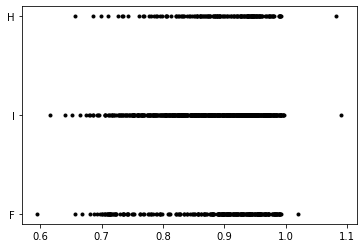

In [20]:
# Lectura del archivo data.csv
kmeans = open('kmeans.csv','r')

line=[]
v1=[]
v2=[]
t=[]

for i in kmeans:
    line = i.split(",")
    v1.append(line[0])
    v2.append(float(line[1]))
    
plt.plot(v2,v1,'k.')
plt.show()    
kmeans.close()


## Ejemplo KMeans con la librería sklearn.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

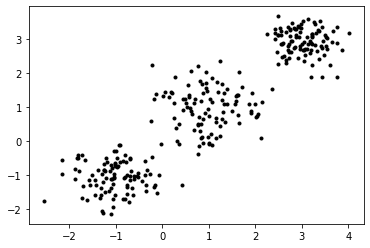

In [13]:
np.random.seed(7)

x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
X = np.concatenate((x1,x2,x3),axis=0)

plt.plot(X[:,0],X[:,1],'k.')
plt.show()

In [21]:
from sklearn.cluster import KMeans

In [22]:
n = 3
k_means = KMeans(n_clusters=n)
k_means.fit(X)

KMeans(n_clusters=3)

In [23]:
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

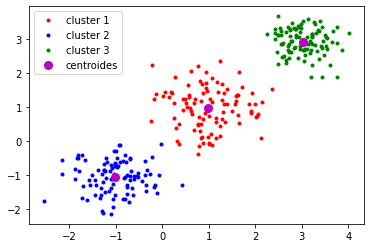

In [24]:
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

## Red semantica

Conjuntivos sujetos top-down.